# Inter-annual variability of MHWs over depth per season

The goal of the code is to investigate the inter-annual time-series MHWs at different depths and correlated them to various variables. The code also creates figure 6 and 7 from the related article.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import datetime
import pandas as pd 
from datetime import date
from datetime import timedelta
import matplotlib.dates as mdates
import glob
import shelve
import numpy.ma as ma
import seaborn as sns
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

In [2]:
plot_folder = 'FIGURES/'# including 2019 sst
ClimatologyPeriod=[1992,2019]
colours = (plt.rcParams['axes.prop_cycle'].by_key()['color'])


# Import data SST

In [5]:
## Get the data from file
Name_platform = 'SST_ESA'
d = shelve.open('SSAVE_' + Name_platform + '_mhws_Strength2018_sst2019')  # open -- file may get suffix added by low-level                          # library
mhws_SST = d['dict_mhws']  
clim_SST = d['dict_clim']
df_SST_all_yearly_MHWdays_year = d['df_SST_all_yearly_MHWdays_year']
df_SST_all_yearly_MHWdays_summer = d['df_SST_all_yearly_MHWdays_summer_3m'] 
df_SST_all_yearly_MHWdays_winter = d['df_SST_all_yearly_MHWdays_winter_3m'] 
d.close()    

# Extract important variables
year_stats_SST = {} 
year_stats_SST['n_days_years_summer2'] = np.array(df_SST_all_yearly_MHWdays_summer['MHWdays'])
year_stats_SST['n_days_years_winter2'] = np.array(df_SST_all_yearly_MHWdays_winter['MHWdays'])
year_stats_SST['n_days_years'] = np.array(df_SST_all_yearly_MHWdays_year['MHWdays'])
years = df_SST_all_yearly_MHWdays_summer.index.values
year_stats_SST['years'] = df_SST_all_yearly_MHWdays_summer.index.values

# Import BOM data

In [7]:
## Load daily averages
import shelve
d = shelve.open('DATA_processed/SSAVE_BOM_Syd_airportdaily_2020_v2')      
df_BOM_all_daily = d['df_BOM_all_daily']                
d.close()  

df_BOM_all_daily.index = pd.to_datetime(df_BOM_all_daily.index)

def fun_Stats_monthly(df_BOM_all_daily):    
    # # Months
    df_BOM_all_monthly_mean = df_BOM_all_daily.groupby(df_BOM_all_daily.index.month).mean()
    df_BOM_all_monthly_std = df_BOM_all_daily.groupby(df_BOM_all_daily.index.month).std()

    return(df_BOM_all_monthly_mean, df_BOM_all_monthly_std)


def fun_Stats_yearly(df_BOM_all_daily):    
    # # Years
    df_BOM_all_yearly_mean = df_BOM_all_daily.groupby(df_BOM_all_daily.index.year).mean()
    df_BOM_all_yearly_std = df_BOM_all_daily.groupby(df_BOM_all_daily.index.year).std()


    ### Seasons
    winter_3m = ((df_BOM_all_daily.index.month >6) & (df_BOM_all_daily.index.month <10)) # Jul - Sep
    summer_3m = ((df_BOM_all_daily.index.month <4)) # Jan - Mar # 

    df_BOM_all_yearly_mean_winter = df_BOM_all_daily[winter_3m].groupby(df_BOM_all_daily[winter_3m].index.year).mean()
    df_BOM_all_yearly_mean_summer = df_BOM_all_daily[summer_3m].groupby(df_BOM_all_daily[summer_3m].index.year).mean()
    
    return(df_BOM_all_yearly_mean, df_BOM_all_yearly_std,df_BOM_all_yearly_mean_winter,df_BOM_all_yearly_mean_summer)


#Note: 
print(ma.corrcoef(ma.masked_invalid(df_BOM_all_daily.Air_temp_ANO), ma.masked_invalid(df_BOM_all_daily.Wind_v_ANO))[1,0])

df_BOM_all_daily



-0.49071238534059686


,Precip_since9AM_mm,Wind_speed_ms,Wind_v,Wind_u,Wind_tau_v,Wind_tau_u,Air_temp,Rel_hum_perc,Wind_MSLP,Precip_since9AM_mm_MAX,...,Wind_speed_STD,Air_temp_STD,Wind_u_rot,Wind_v_rot,Wind_tau_u_rot,Wind_tau_v_rot,Wind_tau_u_rot_ANO,Wind_tau_v_rot_ANO,Wind_tau_u_rot_STD,Wind_tau_v_rot_STD
index,,,,,,,,,,,,,,,,,,,,,
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,22.372,82.837,1007.163,NaN,...,1.565699,2.423014,NaN,NaN,NaN,NaN,NaN,NaN,0.017827,0.043765
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,21.660,78.255,1011.617,NaN,...,1.569955,2.417255,NaN,NaN,NaN,NaN,NaN,NaN,0.017676,0.043966
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,21.929,82.500,1007.024,NaN,...,1.575679,2.414121,NaN,NaN,NaN,NaN,NaN,NaN,0.017529,0.044255
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,16.600,79.378,1001.841,NaN,...,1.581932,2.411294,NaN,NaN,NaN,NaN,NaN,NaN,0.017383,0.044573
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,17.750,75.295,1006.636,NaN,...,1.587011,2.407399,NaN,NaN,NaN,NaN,NaN,NaN,0.017265,0.044731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,7.704,-6.333,-4.085,-0.067305,-0.043414,24.456,59.083,1018.502,0.0,...,1.553926,2.429648,-2.306706,-7.174484,-0.024515,-0.076248,-0.011392,-0.078667,0.018325,0.043272
2019-12-28,0.0,6.108,-4.912,-3.446,-0.037856,-0.026558,24.646,63.229,1015.537,0.0,...,1.556894,2.432219,-2.057261,-5.636518,-0.015855,-0.043439,-0.002646,-0.046011,0.018280,0.043357
2019-12-29,0.0,3.576,-1.847,-2.115,-0.007416,-0.008493,24.031,69.833,1014.492,0.0,...,1.559990,2.435575,-1.564894,-2.331467,-0.006284,-0.009362,0.007051,-0.012075,0.018237,0.043450


# Import GEO data

In [10]:
## Load daily averages
import shelve
d = shelve.open('DATA_raw_other/SSAVE_34_151_4daily_2020_v2')      
#d = shelve.open('SSAVE_GEO_34_152daily_2020')      
df_GEO_all_daily = d['df_GEO_all_daily']                
df_GEO_all = d['df_GEO_all'] 
d.close()  

#df_GEO_all_daily.index = pd.to_datetime(df_GEO_all_daily.index)

def fun_Stats_monthly_GEO(df_GEO_all_daily):    
    # # Months
    df_GEO_all_monthly_mean = df_GEO_all_daily.groupby(df_GEO_all_daily.index.month).mean()
    df_GEO_all_monthly_std = df_GEO_all_daily.groupby(df_GEO_all_daily.index.month).std()

    return(df_GEO_all_monthly_mean, df_GEO_all_monthly_std)


def fun_Stats_yearly_GEO(df_GEO_all_daily):    
    # # Years
    df_GEO_all_yearly_mean = df_GEO_all_daily.groupby(df_GEO_all_daily.index.year).mean()
    df_GEO_all_yearly_std = df_GEO_all_daily.groupby(df_GEO_all_daily.index.year).std()

    ### Seasons
    winter_3m = ((df_GEO_all_daily.index.month >6) & (df_GEO_all_daily.index.month <10)) # Jul - Sep
    summer_3m = ((df_GEO_all_daily.index.month <4)) # Jan - Mar # 

    df_GEO_all_yearly_mean_winter = df_GEO_all_daily[winter_3m].groupby(df_GEO_all_daily[winter_3m].index.year).mean()
    df_GEO_all_yearly_mean_summer = df_GEO_all_daily[summer_3m].groupby(df_GEO_all_daily[summer_3m].index.year).mean()
    
    return(df_GEO_all_yearly_mean, df_GEO_all_yearly_std,df_GEO_all_yearly_mean_winter,df_GEO_all_yearly_mean_summer)

df_GEO_all_daily

,GEO_UCUR,GEO_VCUR,GEO_UCUR_rot,GEO_VCUR_rot,GEO_GSLA,GEO_UCUR_ANO,GEO_VCUR_ANO,GEO_UCUR_rot_ANO,GEO_VCUR_rot_ANO,GEO_UCUR_rot_STD,GEO_VCUR_rot_STD,GEO_GSLA_ANO
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146920,0.318596,NaN
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147055,0.320929,NaN
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147268,0.323382,NaN
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147546,0.325859,NaN
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147894,0.328321,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146854,0.307157,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146892,0.309373,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146888,0.311675,NaN
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146883,0.313983,NaN


# Import ERA5 data 

In [11]:
## Load daily averages
import shelve
d = shelve.open('DATA_raw_other/SSAVE_ERA5_SYDdaily_2020')      
df_ERA5_all_daily = d['df_ERA5_all_daily']                
d.close()  

df_ERA5_all_daily.index = pd.to_datetime(df_ERA5_all_daily.index)

def fun_Stats_monthly_ERA5(df_ERA5_all_daily):    
    # # Months
    df_ERA5_all_monthly_mean = df_ERA5_all_daily.groupby(df_ERA5_all_daily.index.month).mean()
    df_ERA5_all_monthly_std = df_ERA5_all_daily.groupby(df_ERA5_all_daily.index.month).std()

    return(df_ERA5_all_monthly_mean, df_ERA5_all_monthly_std)


def fun_Stats_yearly_ERA5(df_ERA5_all_daily):    
    # # Years
    df_ERA5_all_yearly_mean = df_ERA5_all_daily.groupby(df_ERA5_all_daily.index.year).mean()
    df_ERA5_all_yearly_std = df_ERA5_all_daily.groupby(df_ERA5_all_daily.index.year).std()

    ### Seasons
    winter_3m = ((df_ERA5_all_daily.index.month >6) & (df_ERA5_all_daily.index.month  <10)) # Jul - Sep
    summer_3m = ((df_ERA5_all_daily.index.month <4)) # Jan - Mar # 

    df_ERA5_all_yearly_mean_winter = df_ERA5_all_daily[winter_3m].groupby(df_ERA5_all_daily[winter_3m].index.year).mean()
    df_ERA5_all_yearly_mean_summer = df_ERA5_all_daily[summer_3m].groupby(df_ERA5_all_daily[summer_3m].index.year).mean()

    return(df_ERA5_all_yearly_mean, df_ERA5_all_yearly_std,df_ERA5_all_yearly_mean_winter,df_ERA5_all_yearly_mean_summer)

df_ERA5_all_daily


,QLW,QNET,QSW,QSENS,QLAT,WINDX,WINDY,WIND,SSTera5,T2Mera5,...,QSENS_large_ANO,QSENS_large_STD,WINDX_large_ANO,WINDX_large_STD,WINDY_large_ANO,WINDY_large_STD,WIND_large_ANO,WIND_large_STD,SSTera5_large_ANO,SSTera5_large_STD
1992-01-01,-39.339767,82.766884,217.405548,-6.787231,-88.511665,-2.333716,-5.381934,6.106609,21.855865,21.726761,...,4.893883,16.329511,-2.243207,2.649010,-5.980591,5.392189,1.625785,2.264583,-0.390727,0.771790
1992-01-02,-61.004326,101.463844,278.423035,-21.206793,-94.748077,-0.834330,5.959150,6.169837,21.487335,20.460114,...,6.097384,16.321508,1.328806,2.635426,0.737912,5.399648,-4.762126,2.263570,-0.773042,0.772805
1992-01-03,-35.807209,138.350357,240.179276,-14.163921,-51.857780,-1.614849,0.887314,5.075078,21.134644,20.593147,...,9.303376,16.339284,-0.089102,2.622601,-2.176607,5.406280,-2.015285,2.264144,-1.162027,0.773775
1992-01-04,-75.201584,-45.966133,213.645432,-30.565311,-153.844666,5.324850,3.654586,7.353973,20.958832,18.271034,...,-18.258490,16.350513,9.329454,2.608086,3.930937,5.413794,1.989246,2.265103,-1.382541,0.774867
1992-01-05,-79.815125,-4.501793,250.590027,-24.241884,-151.034805,3.550818,-0.219716,4.184144,21.016296,18.535789,...,-19.086158,16.333796,8.094447,2.593191,2.909833,5.416096,0.667942,2.266781,-1.363560,0.776252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-90.105621,133.231369,374.250732,-16.205223,-134.708527,-3.588104,-6.504250,7.570815,22.397461,22.115143,...,7.270433,16.292107,-1.558023,2.656397,-6.304234,5.376583,1.607032,2.287189,0.582020,0.759089
2019-12-28,-93.947952,170.305374,379.007568,-11.905830,-102.848427,-3.393966,-6.458878,7.366675,22.456207,22.540092,...,13.467254,16.324588,-0.842626,2.662288,-8.421849,5.381114,3.225207,2.280251,0.447629,0.762333
2019-12-29,-81.088745,209.480438,366.032806,-13.317856,-62.145760,-3.365187,-4.265198,5.622786,22.802979,22.677689,...,12.461798,16.369118,-1.510323,2.667361,-7.565442,5.384273,2.682720,2.274883,0.292171,0.765456
2019-12-30,-88.680351,178.695801,375.443359,-5.522926,-102.544296,-3.514915,-7.564573,8.403537,22.439514,22.976059,...,22.492472,16.373900,-1.390325,2.666939,-10.399253,5.386409,5.292326,2.269613,0.380517,0.768225


# Import ADCP data 


In [14]:
## Load daily averages
import shelve
d = shelve.open('DATA_raw_other/SSAVE_ADCPdaily_2020_v2')      
df_ADCP_all_daily = d['df_ADCP_all_daily']                
df_ADCP_all = d['df_ADCP_all'] 
d.close()  


def fun_Stats_monthly_ADCP(df_ADCP_all_daily):    
    # # Months
    df_ADCP_all_monthly_mean = df_ADCP_all_daily.groupby(df_ADCP_all_daily.index.month).mean()
    df_ADCP_all_monthly_std = df_ADCP_all_daily.groupby(df_ADCP_all_daily.index.month).std()

    return(df_ADCP_all_monthly_mean, df_ADCP_all_monthly_std)


def fun_Stats_yearly_ADCP(df_ADCP_all_daily):    
    # # Years
    df_ADCP_all_yearly_mean = df_ADCP_all_daily.groupby(df_ADCP_all_daily.index.year).mean()
    df_ADCP_all_yearly_std = df_ADCP_all_daily.groupby(df_ADCP_all_daily.index.year).std()

    ### Seasons
    winter_3m = ((df_ADCP_all_daily.index.month >6) & (df_ADCP_all_daily.index.month  <10)) # Jul - Sep
    summer_3m = ((df_ADCP_all_daily.index.month <4)) # Jan - Mar # 

    df_ADCP_all_yearly_mean_winter = df_ADCP_all_daily[winter_3m].groupby(df_ADCP_all_daily[winter_3m].index.year).mean()
    df_ADCP_all_yearly_mean_summer = df_ADCP_all_daily[summer_3m].groupby(df_ADCP_all_daily[summer_3m].index.year).mean()
    
    return(df_ADCP_all_yearly_mean, df_ADCP_all_yearly_std,df_ADCP_all_yearly_mean_winter,df_ADCP_all_yearly_mean_summer)

df_ADCP_all_daily

,ADCP_VCUR_ROT_int,ADCP_UCUR_ROT_int,ADCP_VCUR_17m,ADCP_UCUR_17m,ADCP_VCUR_53m,ADCP_UCUR_53m,ADCP_VCUR_ROT_int_ANO,ADCP_UCUR_ROT_int_ANO,ADCP_VCUR_17m_ANO,ADCP_UCUR_17m_ANO,ADCP_VCUR_53m_ANO,ADCP_UCUR_53m_ANO,ADCP_VCUR_ROT_int_STD,ADCP_UCUR_ROT_int_STD,ADCP_VCUR_17m_STD,ADCP_UCUR_17m_STD,ADCP_VCUR_53m_STD,ADCP_UCUR_53m_STD
1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150836,0.014663,0.212240,0.060906,0.102901,0.043348
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151687,0.014680,0.213449,0.061005,0.103705,0.043475
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152544,0.014705,0.214547,0.061100,0.104587,0.043650
1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153501,0.014773,0.215777,0.061236,0.105537,0.043892
1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154657,0.014854,0.217236,0.061465,0.106588,0.044153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-0.195,-0.002,-0.335,-0.104,-0.064,-0.031,-0.156411,0.004120,-0.249712,-0.074495,-0.052366,-0.017974,0.145137,0.014439,0.204315,0.058821,0.098572,0.042129
2019-12-28,-0.259,0.014,-0.441,-0.088,-0.115,-0.040,-0.219624,0.020256,-0.354803,-0.058174,-0.102850,-0.026627,0.146214,0.014500,0.205899,0.059284,0.099274,0.042371
2019-12-29,-0.109,-0.001,-0.249,-0.070,-0.006,0.007,-0.068821,0.005387,-0.161847,-0.039852,0.006659,0.020730,0.147367,0.014550,0.207448,0.059721,0.100142,0.042686
2019-12-30,-0.004,-0.017,-0.155,-0.039,0.104,-0.003,0.037107,-0.010495,-0.066767,-0.008485,0.117311,0.011085,0.148664,0.014590,0.209204,0.060224,0.101138,0.043029


# Average daily time-series into seaons per year

In [15]:
# Get all yearly dataframe

df_BOM_all_yearly_mean, df_BOM_all_yearly_std,df_BOM_all_yearly_mean_winter,df_BOM_all_yearly_mean_summer = fun_Stats_yearly(df_BOM_all_daily)

df_GEO_all_yearly_mean, df_GEO_all_yearly_std,df_GEO_all_yearly_mean_winter,df_GEO_all_yearly_mean_summer = fun_Stats_yearly_GEO(df_GEO_all_daily)

df_ADCP_all_yearly_mean, df_ADCP_all_yearly_std,df_ADCP_all_yearly_mean_winter,df_ADCP_all_yearly_mean_summer = fun_Stats_yearly_ADCP(df_ADCP_all_daily)

df_ERA5_all_yearly_mean, df_ERA5_all_yearly_std,df_ERA5_all_yearly_mean_winter,df_ERA5_all_yearly_mean_summer = fun_Stats_yearly_ERA5(df_ERA5_all_daily)


# Inter-annual variability of MHW day counts for each depth per season

DATA_processed\SAVE_ORS065_mhws_Strength2018_z20
DATA_processed\SAVE_ORS065_mhws_Strength2018_z25
DATA_processed\SAVE_ORS065_mhws_Strength2018_z30
DATA_processed\SAVE_ORS065_mhws_Strength2018_z35
DATA_processed\SAVE_ORS065_mhws_Strength2018_z40
DATA_processed\SAVE_ORS065_mhws_Strength2018_z45
DATA_processed\SAVE_ORS065_mhws_Strength2018_z50
DATA_processed\SAVE_ORS065_mhws_Strength2018_z53


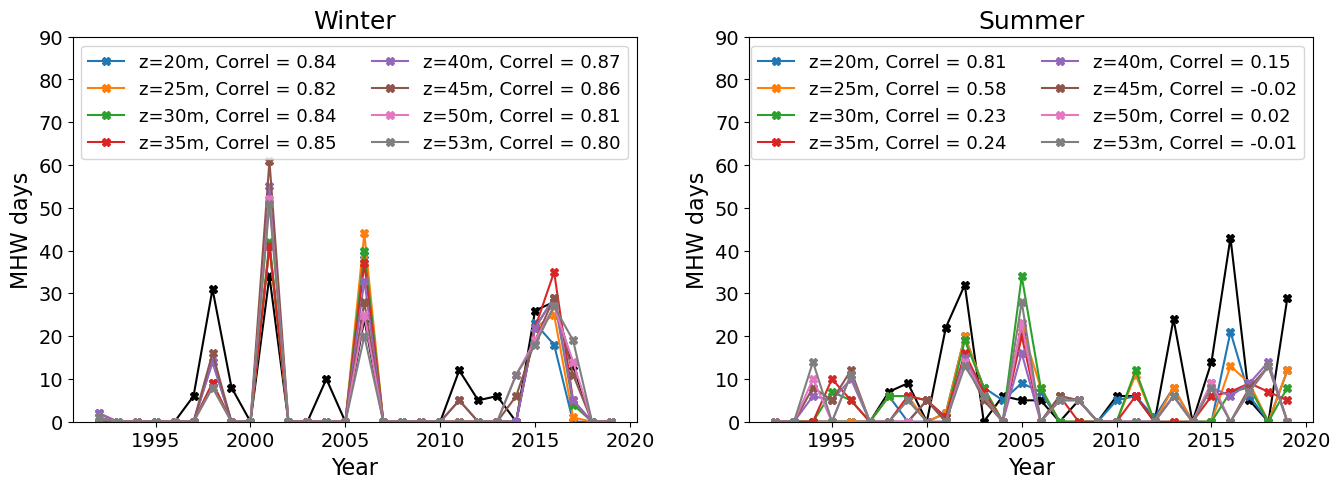

In [18]:
# Figure with correlation coefficients

# Files for ORS065, loop over all
Name_platform = 'ORS065'
list_FILES = sorted(glob.glob('DATA_processed/SAVE_' + Name_platform + '_mhws_Strength2018' + '_z*.dir')) #print(list_FILES[0][0:-4])
N_FILES = len(list_FILES)

FILE = list_FILES[-1][0:-4]
coef_corr_winter_all = []
coef_corr_summer_all = []
DEPTH_correl = []

    
######## Figure     
plt.rc('font', size=14)
plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)
plt.plot(year_stats_SST['years'],year_stats_SST['n_days_years_winter2'],'-kX')
ax2 = plt.subplot(1,2,2)
plt.plot(year_stats_SST['years'],year_stats_SST['n_days_years_summer2'],'-kX')

### Loop all files depths
for f in range(4,N_FILES,1):
    FILE = list_FILES[f][0:-4]     
    print(FILE)

    d = shelve.open(FILE) 
    depth = d['DEPTHS'] 
    mhws_ORS065 = d['dict_mhws']  
    clim_ORS065 = d['dict_clim']
    year_stats_ORS065 = d['dict_year_stats']
    DEPTH_correl.append(depth)
    d.close()    

    nonansOK = (~np.isnan(year_stats_SST['n_days_years_winter2']) & ~np.isnan(year_stats_ORS065['n_days_years_winter2_3m'])) # Carefull! summer is missing last year    
    coef_corr_winter = np.corrcoef(year_stats_SST['n_days_years_winter2'][nonansOK],year_stats_ORS065['n_days_years_winter2_3m'][nonansOK])[0,1]  
    nonansOK = (~np.isnan(year_stats_SST['n_days_years_summer2']) & ~np.isnan(year_stats_ORS065['n_days_years_summer2_3m'])) # Carefull! summer is missing last year    
    coef_corr_summer = np.corrcoef(year_stats_SST['n_days_years_summer2'][nonansOK],year_stats_ORS065['n_days_years_summer2_3m'][nonansOK])[0,1]  

    coef_corr_winter_all.append(coef_corr_winter)
    coef_corr_summer_all.append(coef_corr_summer)

    ax1 = plt.subplot(1,2,1)
    plt.plot(year_stats_SST['years'],year_stats_ORS065['n_days_years_winter2_3m'],'-X', label = 'z=' + str(depth) + 'm, Correl = '+ "{:4.2f}".format(coef_corr_winter))
    plt.legend(ncol=2, fontsize=13)
    plt.ylim([0,90])
    plt.ylabel('MHW days', size=16)
    plt.xlabel('Year', size=16)
    plt.title('Winter',size=18)
    ax2 = plt.subplot(1,2,2)
    plt.plot(year_stats_SST['years'],year_stats_ORS065['n_days_years_summer2_3m'],'-X', label = 'z=' + str(depth) + 'm, Correl = '+ "{:4.2f}".format(coef_corr_summer))
    plt.legend(ncol=2, fontsize=13)
    plt.ylim([0,90])
    plt.ylabel('MHW days', size=16)
    plt.xlabel('Year', size=16)
    plt.title('Summer',size=18)
   
plt.savefig(plot_folder + 'plot_correl_year_SST_ORS065_3m.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()



# Import data ORS065

DATA_processed\SAVE_ORS065_mhws_Strength2018_z20
DATA_processed\SAVE_ORS065_mhws_Strength2018_z25
DATA_processed\SAVE_ORS065_mhws_Strength2018_z30
DATA_processed\SAVE_ORS065_mhws_Strength2018_z35
DATA_processed\SAVE_ORS065_mhws_Strength2018_z40
DATA_processed\SAVE_ORS065_mhws_Strength2018_z45
DATA_processed\SAVE_ORS065_mhws_Strength2018_z50
DATA_processed\SAVE_ORS065_mhws_Strength2018_z53


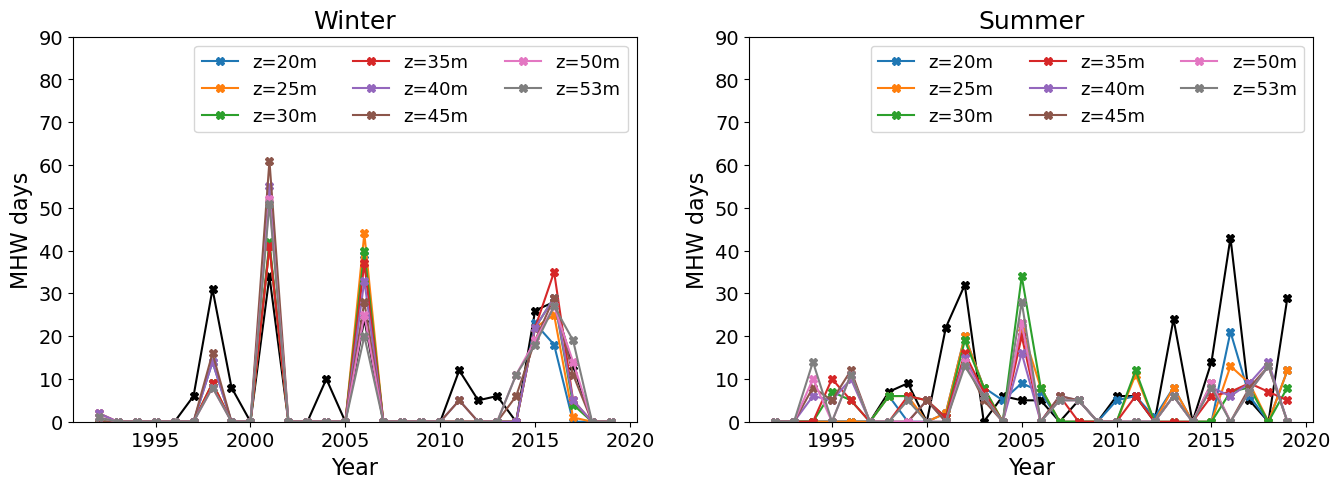

In [19]:
#### ARCTICLE figure 6-7 top

# Files for ORS065, loop over all
Name_platform = 'ORS065'
list_FILES = sorted(glob.glob('DATA_processed/SAVE_' + Name_platform + '_mhws_Strength2018' + '_z*.dir')) #print(list_FILES[0][0:-4])
N_FILES = len(list_FILES)

FILE = list_FILES[-1][0:-4]
    
######## Figure    
plt.rc('font', size=14)
plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)
plt.plot(year_stats_SST['years'],year_stats_SST['n_days_years_winter2'],'-kX')
ax2 = plt.subplot(1,2,2)
plt.plot(year_stats_SST['years'],year_stats_SST['n_days_years_summer2'],'-kX')

### Loop all files depths
for f in range(4,N_FILES,1):
    FILE = list_FILES[f][0:-4]     
    print(FILE)

    d = shelve.open(FILE) 
    depth = d['DEPTHS'] 
    mhws_ORS065 = d['dict_mhws']  
    clim_ORS065 = d['dict_clim']
    year_stats_ORS065 = d['dict_year_stats']
    d.close()    


    ax1 = plt.subplot(1,2,1)
    plt.plot(year_stats_SST['years'],year_stats_ORS065['n_days_years_winter2_3m'],'-X', label = 'z=' + str(depth) + 'm')
    plt.legend(ncol=3, fontsize=13)
    plt.ylim([0,90])
    plt.ylabel('MHW days', size=16)
    plt.xlabel('Year', size=16)
    plt.title('Winter',size=18)
    ax2 = plt.subplot(1,2,2)
    plt.plot(year_stats_SST['years'],year_stats_ORS065['n_days_years_summer2_3m'],'-X', label = 'z=' + str(depth) + 'm')
    plt.legend(ncol=3, fontsize=13)
    plt.ylim([0,90])
    plt.ylabel('MHW days', size=16)
    plt.xlabel('Year', size=16)
    plt.title('Summer',size=18)
   
plt.savefig(plot_folder + 'plot_correl_year_SST_ORS065_3m_naked.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()



In [20]:
# ### Correlation of common days from SST per year
# fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(3, 6))

# #fig,ax = plt.subplots(figsize=(2,5))
# plt.scatter(coef_corr_winter_all,DEPTH_correl,label = 'winter')
# plt.scatter(coef_corr_summer_all,DEPTH_correl,label = 'summer')
# plt.gca().invert_yaxis()
# plt.title('Inter-annual MHW days',size=16)
# plt.xlabel('Correlation',size=14)
# plt.ylabel('Depth [m]',size=14)
# plt.legend(fontsize = 12)
# plt.ylim([60,0])
# plt.xlim([0,1])
# #plt.axvline(0, color='black',linewidth=1,linestyle='dashed')
# plt.savefig(plot_folder + 'plot_MHWS_scatter_interannualMHWs_fromSST2.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
# plt.show()



# Create dataframes with all variables per year or season

In [21]:
#### Dataset
Name_platform = 'ORS065'
list_FILES = sorted(glob.glob('DATA_processed/SAVE_' + Name_platform + '_mhws_Strength2018' + '_z*.dir')) #print(list_FILES[0][0:-4])
N_FILES = len(list_FILES)

# Put in dataframe
df_Correl_ADCP_year = pd.DataFrame(columns=['depth', 'ADCP_VCUR_ROT_int', 'ADCP_UCUR_ROT_int', 'ADCP_VCUR_17m', 'ADCP_UCUR_17m', 'ADCP_VCUR_53m', 'ADCP_UCUR_53m'])
df_Correl_ADCP_summer = pd.DataFrame(columns=['depth', 'ADCP_VCUR_ROT_int', 'ADCP_UCUR_ROT_int', 'ADCP_VCUR_17m', 'ADCP_UCUR_17m', 'ADCP_VCUR_53m', 'ADCP_UCUR_53m'])
df_Correl_ADCP_winter = pd.DataFrame(columns=['depth', 'ADCP_VCUR_ROT_int', 'ADCP_UCUR_ROT_int', 'ADCP_VCUR_17m', 'ADCP_UCUR_17m', 'ADCP_VCUR_53m', 'ADCP_UCUR_53m'])
df_Correl_GEO_year = pd.DataFrame(columns=['depth', 'GEO_UCUR', 'GEO_VCUR', 'GEO_UCUR_rot', 'GEO_VCUR_rot', 'GEO_UCUR_ANO', 'GEO_VCUR_ANO'])
df_Correl_GEO_summer = pd.DataFrame(columns=['depth', 'GEO_UCUR', 'GEO_VCUR', 'GEO_UCUR_rot', 'GEO_VCUR_rot', 'GEO_UCUR_ANO', 'GEO_VCUR_ANO'])
df_Correl_GEO_winter = pd.DataFrame(columns=['depth', 'GEO_UCUR', 'GEO_VCUR', 'GEO_UCUR_rot', 'GEO_VCUR_rot', 'GEO_UCUR_ANO', 'GEO_VCUR_ANO'])
df_Correl_BOM_year = pd.DataFrame(columns=['depth', 'Air_temp', 'Air_temp_ANO', 'Wind_u', 'Wind_v', 'Wind_speed_ms', 'Wind_MSLP', 'Wind_MSLP_ANO', 'Rel_hum_perc', 'Rel_hum_perc_ANO', \
'Wind_v_rot', 'Wind_u_rot', 'Wind_tau_v_rot', 'Wind_tau_u_rot', 'Precip_since9AM_mm_MAX', 'Wind_speed_ANO', 'Wind_u_ANO', 'Wind_v_ANO'])
df_Correl_BOM_summer = pd.DataFrame(columns=['depth', 'Air_temp', 'Air_temp_ANO', 'Wind_u', 'Wind_v', 'Wind_speed_ms', 'Wind_MSLP', 'Wind_MSLP_ANO', 'Rel_hum_perc', 'Rel_hum_perc_ANO', \
'Wind_v_rot', 'Wind_u_rot', 'Wind_tau_v_rot', 'Wind_tau_u_rot', 'Precip_since9AM_mm_MAX', 'Wind_speed_ANO', 'Wind_u_ANO', 'Wind_v_ANO'])
df_Correl_BOM_winter = pd.DataFrame(columns=['depth', 'Air_temp', 'Air_temp_ANO', 'Wind_u', 'Wind_v', 'Wind_speed_ms', 'Wind_MSLP', 'Wind_MSLP_ANO', 'Rel_hum_perc', 'Rel_hum_perc_ANO', \
'Wind_v_rot', 'Wind_u_rot', 'Wind_tau_v_rot', 'Wind_tau_u_rot', 'Precip_since9AM_mm_MAX', 'Wind_speed_ANO', 'Wind_u_ANO', 'Wind_v_ANO'])
df_Correl_OFAM_year = pd.DataFrame(columns=['depth', 'QSW_ANO', 'QLAT_ANO', 'QLW_ANO', 'QSENS_ANO','TAUX','TAUY', 'TAUX_ANO', 'TAUY_ANO', 'TAU_ANO'])
df_Correl_OFAM_summer = pd.DataFrame(columns=['depth', 'QSW_ANO', 'QLAT_ANO', 'QLW_ANO', 'QSENS_ANO','TAUX','TAUY', 'TAUX_ANO', 'TAUY_ANO', 'TAU_ANO'])
df_Correl_OFAM_winter = pd.DataFrame(columns=['depth', 'QSW_ANO', 'QLAT_ANO', 'QLW_ANO', 'QSENS_ANO','TAUX','TAUY', 'TAUX_ANO', 'TAUY_ANO', 'TAU_ANO'])


### Loop all files depths
for f in range(N_FILES):
    FILE = list_FILES[f][0:-4]     
    print(FILE)

    d = shelve.open(FILE) 
    depth = d['DEPTHS'] 
    mhws_ORS065 = d['dict_mhws']  
    clim_ORS065 = d['dict_clim']
    year_stats_ORS065 = d['dict_year_stats']
    d.close()    
    
    if depth==53:
        mhws_ORS065_53m = mhws_ORS065
    if depth==20:
        mhws_ORS065_20m = mhws_ORS065
                
        df_ORS065_all_yearly_MHWdays_year = pd.DataFrame({'MHWdays_' + str(depth) + 'm': np.array(year_stats_ORS065['n_days_years'])})
        df_ORS065_all_yearly_MHWdays_year.index = np.array(year_stats_ORS065['years']) #### CAREFUL!
        df_ORS065_all_yearly_MHWdays_summer = pd.DataFrame({'MHWdays_20m': np.array(year_stats_ORS065['n_days_years_summer2_3m'])})
        df_ORS065_all_yearly_MHWdays_summer.index = np.array(year_stats_ORS065['years']) #### CAREFUL!
        df_ORS065_all_yearly_MHWdays_winter = pd.DataFrame({'MHWdays_20m': np.array(year_stats_ORS065['n_days_years_winter2_3m'])})
        df_ORS065_all_yearly_MHWdays_winter.index = np.array(year_stats_ORS065['years']) #### CAREFUL! 

    if depth>20:       
            df_ORS065_all_yearly_MHWdays_year.insert(len(df_ORS065_all_yearly_MHWdays_year.columns),'MHWdays_' + str(depth) + 'm', np.array(year_stats_ORS065['n_days_years'])) 
            df_ORS065_all_yearly_MHWdays_summer.insert(len(df_ORS065_all_yearly_MHWdays_summer.columns),'MHWdays_' + str(depth) + 'm', np.array(year_stats_ORS065['n_days_years_summer2_3m']))  
            df_ORS065_all_yearly_MHWdays_winter.insert(len(df_ORS065_all_yearly_MHWdays_winter.columns),'MHWdays_' + str(depth) + 'm', np.array(year_stats_ORS065['n_days_years_winter2_3m']))  

        




DATA_processed\SAVE_ORS065_mhws_Strength2018_z01
DATA_processed\SAVE_ORS065_mhws_Strength2018_z05
DATA_processed\SAVE_ORS065_mhws_Strength2018_z10
DATA_processed\SAVE_ORS065_mhws_Strength2018_z15
DATA_processed\SAVE_ORS065_mhws_Strength2018_z20
DATA_processed\SAVE_ORS065_mhws_Strength2018_z25
DATA_processed\SAVE_ORS065_mhws_Strength2018_z30
DATA_processed\SAVE_ORS065_mhws_Strength2018_z35
DATA_processed\SAVE_ORS065_mhws_Strength2018_z40
DATA_processed\SAVE_ORS065_mhws_Strength2018_z45
DATA_processed\SAVE_ORS065_mhws_Strength2018_z50
DATA_processed\SAVE_ORS065_mhws_Strength2018_z53


In [22]:
### Concatenate all dataframes per season

# Year 
frames = [df_SST_all_yearly_MHWdays_year,df_ORS065_all_yearly_MHWdays_year, df_BOM_all_yearly_mean, df_ADCP_all_yearly_mean,df_GEO_all_yearly_mean,df_ERA5_all_yearly_mean]
df_all_yearly_mean_ERA5 = pd.concat(frames, axis=1)
df_all_yearly_mean_ERA5

# Year _winter
frames_winter = [df_SST_all_yearly_MHWdays_winter,df_ORS065_all_yearly_MHWdays_winter, df_BOM_all_yearly_mean_winter ,df_ADCP_all_yearly_mean_winter, df_GEO_all_yearly_mean_winter,df_ERA5_all_yearly_mean_winter]
df_all_yearly_mean_ERA5_winter = pd.concat(frames_winter, axis=1)
df_all_yearly_mean_ERA5_winter

# Year _summer
frames = [df_SST_all_yearly_MHWdays_summer,df_ORS065_all_yearly_MHWdays_summer,df_BOM_all_yearly_mean_summer , df_ADCP_all_yearly_mean_summer,df_GEO_all_yearly_mean_summer,df_ERA5_all_yearly_mean_summer]
df_all_yearly_mean_ERA5_summer = pd.concat(frames, axis=1)
df_all_yearly_mean_ERA5_summer


,MHWdays,MHWdays_20m,MHWdays_25m,MHWdays_30m,MHWdays_35m,MHWdays_40m,MHWdays_45m,MHWdays_50m,MHWdays_53m,Precip_since9AM_mm,...,QSENS_large_ANO,QSENS_large_STD,WINDX_large_ANO,WINDX_large_STD,WINDY_large_ANO,WINDY_large_STD,WIND_large_ANO,WIND_large_STD,SSTera5_large_ANO,SSTera5_large_STD
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.878189,16.865374,0.035570,2.705523,0.919362,5.172700,-0.468621,2.297393,-0.885067,0.770477
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.831786,16.818722,0.628170,2.701082,-0.312453,5.174197,-0.279103,2.295433,-0.696980,0.770713
1994,0.0,0.0,0.0,0.0,0.0,6.0,8.0,10.0,14.0,NaN,...,-1.422987,16.818722,-0.196662,2.701082,-0.231462,5.174197,0.044805,2.295433,-0.577240,0.770713
1995,0.0,0.0,0.0,7.0,10.0,5.0,5.0,0.0,0.0,NaN,...,-0.071099,16.818722,-0.301233,2.701082,1.036759,5.174197,0.278750,2.295433,-0.897242,0.770713
1996,0.0,0.0,0.0,5.0,5.0,10.0,12.0,11.0,11.0,1.745671,...,-0.540589,16.865374,0.391668,2.705523,1.103618,5.172700,-0.197407,2.297393,-0.952308,0.770477
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.195844,...,-2.384987,16.818722,0.032979,2.701082,0.488277,5.174197,-0.225075,2.295433,-0.254568,0.770713
1998,7.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.895416,...,0.354308,16.818722,0.777555,2.701082,-0.385108,5.174197,-0.029660,2.295433,0.712642,0.770713
1999,9.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,5.0,1.912567,...,-1.972715,16.818722,-0.466447,2.701082,0.475229,5.174197,-0.069774,2.295433,0.774275,0.770713
2000,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,0.0,1.471956,...,-0.963248,16.865374,-0.008037,2.705523,-0.332379,5.172700,0.537248,2.297393,-0.432606,0.770477
2001,22.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.629133,...,-0.991863,16.818722,-0.343269,2.701082,-0.463537,5.174197,0.195929,2.295433,0.520489,0.770713


# Correlate time-series

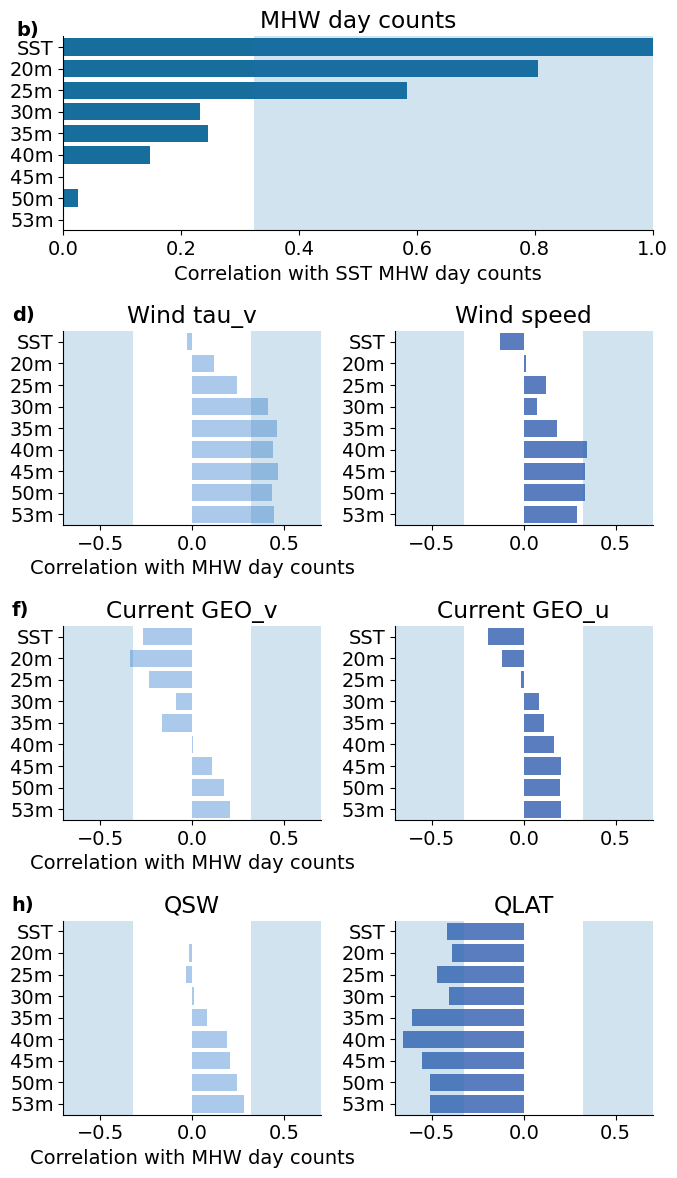

In [23]:
#### ARCTICLE figure 7 right

cols_plot_ERA5 = ['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m',\
             'Wind_speed_ANO', 'Wind_v_ANO', 'Wind_u_ANO', 'Air_temp_ANO', 'Rel_hum_perc_ANO', 'Wind_MSLP_ANO', \
             'WINDX_ANO', 'WINDY_ANO', 'WIND_ANO','QSW_ANO', 'QLW_ANO', 'QLAT_ANO', 'QSENS_ANO','QSW', 'QLW', 'QLAT', 'QSENS', \
             'WINDX_large_ANO', 'WINDY_large_ANO', 'WIND_large_ANO','QSW_large_ANO', 'QLW_large_ANO', 'QLAT_large_ANO', 'QSENS_large_ANO','QSW_large', 'QLW_large', 'QLAT_large', 'QSENS_large', \
             'GEO_UCUR_ANO','GEO_VCUR_ANO','GEO_GSLA_ANO']
bbb = df_all_yearly_mean_ERA5_summer[cols_plot_ERA5].corr()[['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m']] #.sort_values(by='MHWdays', ascending=False)
bbb_pvalue = df_all_yearly_mean_ERA5_summer[cols_plot_ERA5].corr(method=pearsonr_pval)[['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m']]

bbb_names = bbb.copy()
bbb_names.rename(columns={'MHWdays':'SST','MHWdays_20m':'20m','MHWdays_25m':'25m','MHWdays_30m':'30m'
                         ,'MHWdays_35m':'35m','MHWdays_40m':'40m','MHWdays_45m':'45m'
                         ,'MHWdays_50m':'50m','MHWdays_53m':'53m'}, inplace=True)


### Figure
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(7, 12), facecolor='white')
gs = axs[1, 1].get_gridspec()

for ax in axs[0,0:2]: # a 
    ax.remove()
for ax in axs[1,0:2]: # a 
    ax.remove()
for ax in axs[2,0:2]: # a 
    ax.remove()
for ax in axs[3,0:2]: # a 
    ax.remove()

# MHW counts 
ax = fig.add_subplot(gs[0, 0:2])
sns.set_color_codes("colorblind")
ax = sns.barplot(x = bbb_names.T.MHWdays, y = bbb_names.T.index,
            label="MHWdays", color="b")
ax.set(xlim=(0, 1), ylabel="",title='MHW day counts',
       xlabel="Correlation with SST MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
ax.annotate("b)", xy=(-0.08, 1.0), xycoords="axes fraction", fontweight="bold")
sns.despine()

# WIND
ax = fig.add_subplot(gs[1, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.Wind_v_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Wind tau_v',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("d)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[1, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.Wind_speed_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Wind speed',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()

# CURRENT
ax = fig.add_subplot(gs[2, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.GEO_VCUR_ANO, y = bbb_names.T.index,
            label="GEO_VCUR_ANO", color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Current GEO_v',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("f)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[2, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.GEO_UCUR_ANO, y = bbb_names.T.index,
            label="GEO_UCUR_ANO", color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="", title='Current GEO_u',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()

# FLUX ERA5
ax = fig.add_subplot(gs[3, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.QSW_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='QSW',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("h)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[3, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.QLAT_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="", title='QLAT',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()


# Save
fig.tight_layout()
plt.savefig(plot_folder + 'plot_' + Name_platform + '_correl_summer_FLUX_ERA5_subplot_article.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_' + Name_platform + '_correl_summer_FLUX_ERA5_subplot_article.pdf')  
plt.show()






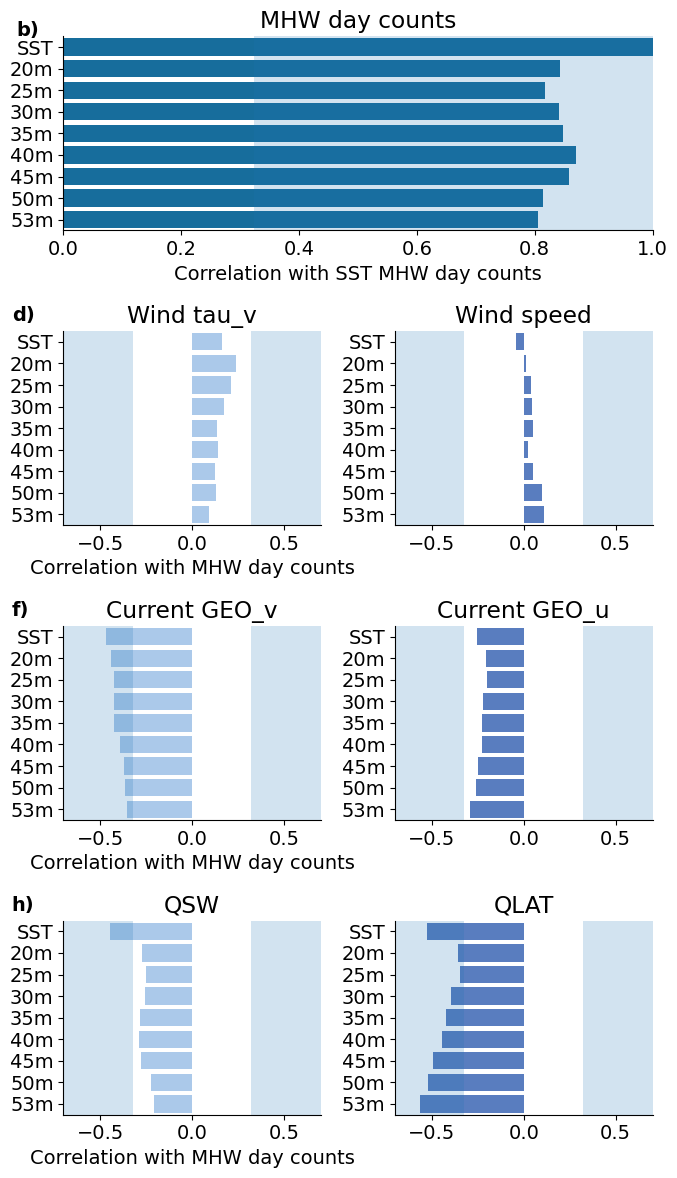

In [24]:
#### ARCTICLE figure 6 right

cols_plot_ERA5 = ['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m',\
             'Wind_speed_ANO', 'Wind_v_ANO', 'Wind_u_ANO', 'Air_temp_ANO', 'Rel_hum_perc_ANO', 'Wind_MSLP_ANO', \
             'WINDX_ANO', 'WINDY_ANO', 'WIND_ANO','QSW_ANO', 'QLW_ANO', 'QLAT_ANO', 'QSENS_ANO','QSW', 'QLW', 'QLAT', 'QSENS', \
             'WINDX_large_ANO', 'WINDY_large_ANO', 'WIND_large_ANO','QSW_large_ANO', 'QLW_large_ANO', 'QLAT_large_ANO', 'QSENS_large_ANO','QSW_large', 'QLW_large', 'QLAT_large', 'QSENS_large', \
             'GEO_UCUR_ANO','GEO_VCUR_ANO','GEO_GSLA_ANO']
bbb = df_all_yearly_mean_ERA5_winter[cols_plot_ERA5].corr()[['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m']] #.sort_values(by='MHWdays', ascending=False)
bbb_pvalue = df_all_yearly_mean_ERA5_winter[cols_plot_ERA5].corr(method=pearsonr_pval)[['MHWdays','MHWdays_20m','MHWdays_25m','MHWdays_30m','MHWdays_35m','MHWdays_40m','MHWdays_45m','MHWdays_50m','MHWdays_53m']]

bbb_names = bbb.copy()
bbb_names.rename(columns={'MHWdays':'SST','MHWdays_20m':'20m','MHWdays_25m':'25m','MHWdays_30m':'30m'
                         ,'MHWdays_35m':'35m','MHWdays_40m':'40m','MHWdays_45m':'45m'
                         ,'MHWdays_50m':'50m','MHWdays_53m':'53m'}, inplace=True)


### Figure
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(7, 12), facecolor='white')
gs = axs[1, 1].get_gridspec()
for ax in axs[0,0:2]: # a 
    ax.remove()
for ax in axs[1,0:2]: # a 
    ax.remove()
for ax in axs[2,0:2]: # a 
    ax.remove()
for ax in axs[3,0:2]: # a 
    ax.remove()

# MHW counts 
ax = fig.add_subplot(gs[0, 0:2])
sns.set_color_codes("colorblind")
ax = sns.barplot(x = bbb_names.T.MHWdays, y = bbb_names.T.index,
            label="MHWdays", color="b")
ax.set(xlim=(0, 1), ylabel="",title='MHW day counts',
       xlabel="Correlation with SST MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
ax.annotate("b)", xy=(-0.08, 1.0), xycoords="axes fraction", fontweight="bold")
sns.despine()

# WIND
ax = fig.add_subplot(gs[1, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.Wind_v_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Wind tau_v',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("d)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[1, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.Wind_speed_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Wind speed',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()

# CURRENT
ax = fig.add_subplot(gs[2, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.GEO_VCUR_ANO, y = bbb_names.T.index,
            label="GEO_VCUR_ANO", color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='Current GEO_v',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("f)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[2, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.GEO_UCUR_ANO, y = bbb_names.T.index,
            label="GEO_UCUR_ANO", color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="", title='Current GEO_u',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()

# FLUX ERA5
ax = fig.add_subplot(gs[3, 0])
sns.set_color_codes("pastel")
ax = sns.barplot(x = bbb_names.T.QSW_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="",title='QSW',
       xlabel="Correlation with MHW day counts")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()
ax.annotate("h)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")

ax = fig.add_subplot(gs[3, 1])
sns.set_color_codes("muted")
ax = sns.barplot(x = bbb_names.T.QLAT_ANO, y = bbb_names.T.index, color="b")
ax.set(xlim=(-0.7, 0.7), ylabel="", title='QLAT',
       xlabel="")
ax.axvspan(-1,-0.323, alpha=0.2) # signif [ <0.1 for df=25]
ax.axvspan(0.323,1, alpha=0.2)
sns.despine()

# Save
fig.tight_layout()
plt.savefig(plot_folder + 'plot_' + Name_platform + '_correl_winter_FLUX_ERA5_subplot_article.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_' + Name_platform + '_correl_winter_FLUX_ERA5_subplot_article.pdf')  
plt.show()



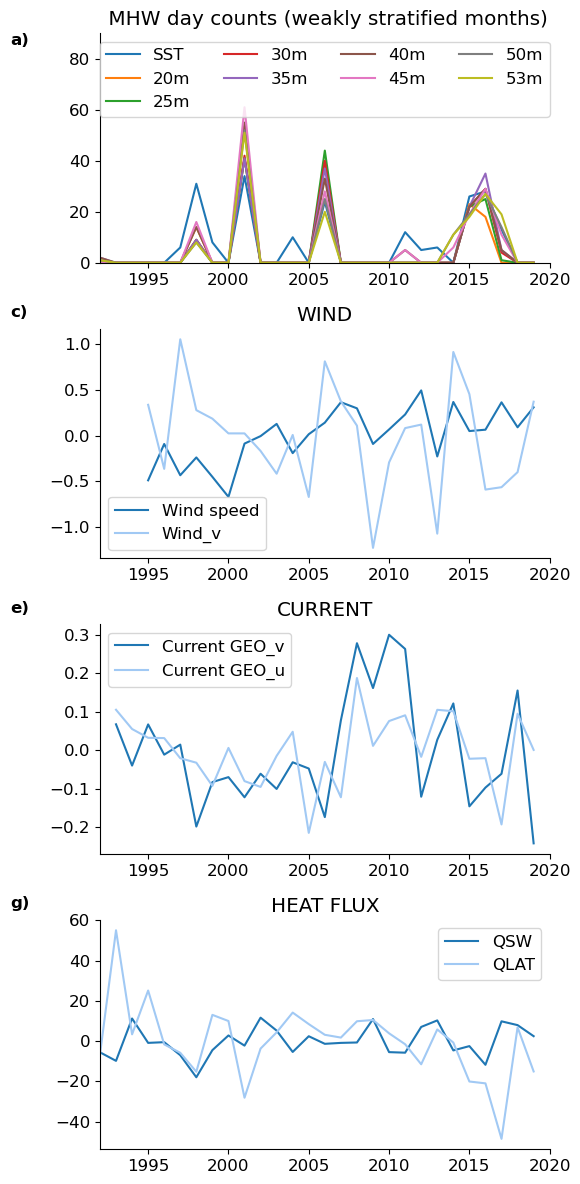

In [26]:
#### ARCTICLE figure 6 left
fig,axs = plt.subplots(4,1, figsize = (6,12), facecolor='white')
plt.rc('font', size=12)


# MHW days counts
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_winter.MHWdays.plot(label='SST',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_20m.plot(label='20m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_25m.plot(label='25m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_30m.plot(label='30m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_35m.plot(label='35m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_40m.plot(label='40m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_45m.plot(label='45m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_50m.plot(label='50m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_winter.MHWdays_53m.plot(label='53m',ax = axs[0])

ax.set(xlim=(1992, 2020), ylim=(0, 90), ylabel="",title=' MHW day counts (weakly stratified months)',
       xlabel="")
ax.legend(loc='upper center', ncol=4)
ax.annotate("a)", xy=(-0.2, 0.95), xycoords="axes fraction", fontweight="bold")
sns.despine()


# WIND
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_winter.Wind_speed_ANO.plot(label='Wind speed',ax = axs[1])
ax = df_all_yearly_mean_ERA5_winter.Wind_v_ANO.plot(label='Wind_v', color="b",ax = axs[1])
ax.set(xlim=(1992, 2020), ylabel="",title='WIND',
       xlabel="")
ax.legend()
ax.annotate("c)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()

# CURRENT
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_winter.GEO_VCUR_ANO.plot(label='Current GEO_v',ax = axs[2])
ax = df_all_yearly_mean_ERA5_winter.GEO_UCUR_ANO.plot(label='Current GEO_u', color="b",ax = axs[2])
ax.set(xlim=(1992, 2020), ylabel="",title='CURRENT',
       xlabel="")
ax.legend()
ax.annotate("e)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()

# FLUX
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_winter.QSW_ANO.plot(label='QSW',ax = axs[3])
ax = df_all_yearly_mean_ERA5_winter.QLAT_ANO.plot(label='QLAT', color="b",ax = axs[3])
ax.set(xlim=(1992, 2020), ylabel="",title='HEAT FLUX',
       xlabel="")
ax.legend()
ax.annotate("g)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()


# Save
fig.tight_layout()
plt.savefig(plot_folder + 'plot_' + Name_platform + '_years_winter_FLUX_era5_subplots.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_' + Name_platform + '_years_winter_FLUX_era5_subplots.pdf')  
plt.show()


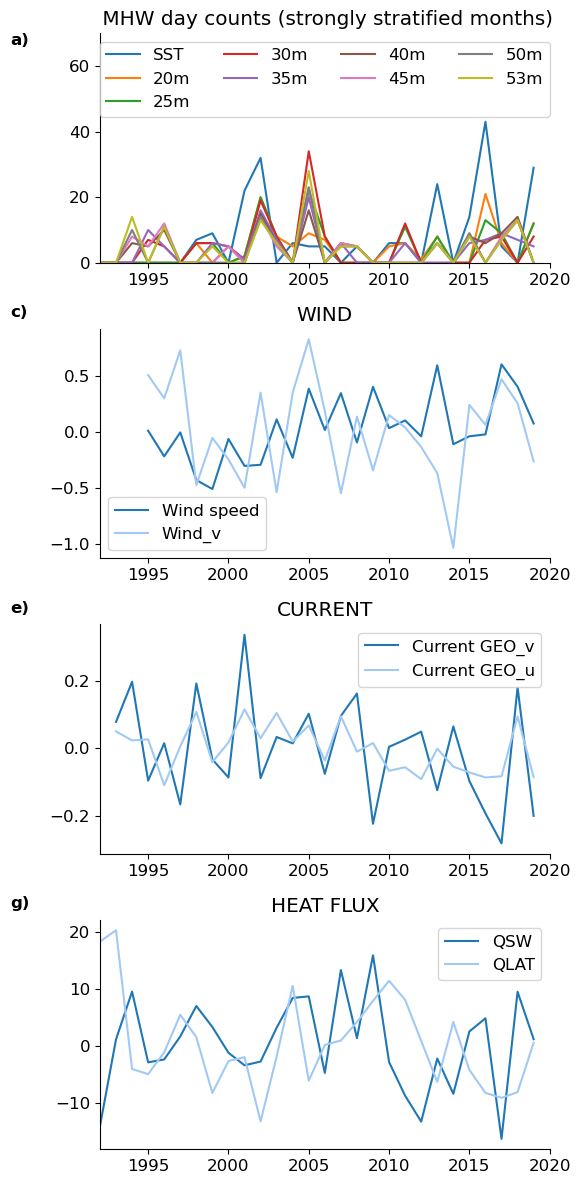

In [27]:
#### ARCTICLE figure 7 left
fig,axs = plt.subplots(4,1, figsize = (6,12), facecolor='white')


## MHW days counts
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_summer.MHWdays.plot(label='SST',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_20m.plot(label='20m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_25m.plot(label='25m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_30m.plot(label='30m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_35m.plot(label='35m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_40m.plot(label='40m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_45m.plot(label='45m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_50m.plot(label='50m',ax = axs[0])
ax = df_all_yearly_mean_ERA5_summer.MHWdays_53m.plot(label='53m',ax = axs[0])
#ax = sns.barplot(aaa.T.GEO_VCUR_ANO, aaa.T.index,
#            label="GEO_VCUR_ANO", color="b", ax=axs)
ax.set(xlim=(1992, 2020), ylim=(0, 70), ylabel="",title=' MHW day counts (strongly stratified months)',
       xlabel="")
ax.legend(loc='upper center', ncol=4)
ax.annotate("a)", xy=(-0.2, 0.95), xycoords="axes fraction", fontweight="bold")
sns.despine()


# WIND
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_summer.Wind_speed_ANO.plot(label='Wind speed',ax = axs[1])
ax = df_all_yearly_mean_ERA5_summer.Wind_v_ANO.plot(label='Wind_v', color="b",ax = axs[1])
ax.set(xlim=(1992, 2020), ylabel="",title='WIND',
       xlabel="")
ax.legend()
ax.annotate("c)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()

# CURRENT
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_summer.GEO_VCUR_ANO.plot(label='Current GEO_v',ax = axs[2])
ax = df_all_yearly_mean_ERA5_summer.GEO_UCUR_ANO.plot(label='Current GEO_u', color="b",ax = axs[2])
ax.set(xlim=(1992, 2020), ylabel="",title='CURRENT',
       xlabel="")
ax.legend()
ax.annotate("e)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()


# FLUX
sns.set_color_codes("pastel")
ax = df_all_yearly_mean_ERA5_summer.QSW_ANO.plot(label='QSW',ax = axs[3])
ax = df_all_yearly_mean_ERA5_summer.QLAT_ANO.plot(label='QLAT', color="b",ax = axs[3])
ax.set(xlim=(1992, 2020), ylabel="",title='HEAT FLUX',
       xlabel="")
ax.legend()
ax.annotate("g)", xy=(-0.2, 1.05), xycoords="axes fraction", fontweight="bold")
sns.despine()


# Save
fig.tight_layout()
plt.savefig(plot_folder + 'plot_' + Name_platform + '_years_summer_FLUX_era5_subplots.png', bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.savefig(plot_folder + 'plot_' + Name_platform + '_years_summer_FLUX_era5_subplots.pdf')  
plt.show()
